In [1]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import sys
sys.path.append('/home/babyostrich/Repos/Omega500AnalysisTools/')
import omega500analysistools.IO.load_db as load_db

from astropy.cosmology import WMAP5

In [2]:
#db_dir = '/home/babyostrich/data/databases/ErwinGoogle/analysis/database/'
db_NR='/home/babyostrich/data/databases/ErwinGoogle/analysis/database/L500_NR_0.db'
db_CSF='/home/babyostrich/data/databases/ErwinGoogle/analysis/database/L500_CSF_0.db'
db_AGN='/home/babyostrich/data/databases/ErwinGoogle/analysis/database/L500_AGN_0.db'

In [3]:
# Load the databases
NR_df = load_db.return_table(db_NR)
CSF_df = load_db.return_table(db_CSF)
AGN_df = load_db.return_table(db_AGN)


In [4]:
print(NR_df.keys())
NR_df['halos'].columns

dict_keys(['mergertree', 'halos', 'mergers', 'profiles'])


Index(['id', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'r_hc', 'M_hc', 'num_particles',
       'vmax_hc', 'rmax_hc', 'aexp', 'r200m', 'M_dark_200m', 'M_gas_200m',
       'M_gas_cold_200m', 'M_star_200m', 'M_star_new_200m', 'M_baryon_200m',
       'M_total_200m', 'vmax_200m', 'rmax_200m', 'gas-Z_II_avg_200m',
       'gas-Z_Ia_avg_200m', 'star-Z_II_avg_200m', 'star-Z_Ia_avg_200m',
       'star_new-Z_II_avg_200m', 'star_new-Z_Ia_avg_200m', 'star-age_avg_200m',
       'r500c', 'M_dark_500c', 'M_gas_500c', 'M_gas_cold_500c', 'M_star_500c',
       'M_star_new_500c', 'M_baryon_500c', 'M_total_500c', 'vmax_500c',
       'rmax_500c', 'gas-Z_II_avg_500c', 'gas-Z_Ia_avg_500c',
       'star-Z_II_avg_500c', 'star-Z_Ia_avg_500c', 'star_new-Z_II_avg_500c',
       'star_new-Z_Ia_avg_500c', 'star-age_avg_500c', 'r200c', 'M_dark_200c',
       'M_gas_200c', 'M_gas_cold_200c', 'M_star_200c', 'M_star_new_200c',
       'M_baryon_200c', 'M_total_200c', 'vmax_200c', 'rmax_200c',
       'gas-Z_II_avg_200c', 'gas-Z_Ia_a

In [5]:
# List all aexps for looping later
AGN_aexps = AGN_df['halos'].aexp.unique()
CSF_aexps = CSF_df['halos'].aexp.unique()
NR_aexps = NR_df['halos'].aexp.unique()

In [47]:
# Selecting based on redshift
def values_at_aexp(df, aexp, field) :
    df_at_aexp = df.loc[df['aexp'] == aexp]
    return df_at_aexp[field]

# Selecting based on mass bin
def values_in_massbin(df, mass_min, mass_max, field, mass_field='M_total_500c') :
    df_in_bin = df.loc[(df[mass_field] > mass_min) & (df[mass_field] <= mass_max)]
    return df_in_bin[field]

# Define mass bins by quantiles
def get_field_edge_pairs(df_column, quantiles=[0,.25,.5,1.]) :
    field_edges = pd.qcut(df_column,[0.,0.25,0.5,1.],retbins=True)[1]
    return zip(field_edges[:-1], field_edges[1:])

def get_subdfs_in_quantiles(df, quantiles=[0.,.25,.5,1.], field_to_cut_on='M_total_500c') :
    # Returns dataframe separated in a list corresponding to field bin edges
    field_edge_pairs = get_field_edge_pairs(df[field_to_cut_on], quantiles=quantiles)
    return [ df.loc[(df[field_to_cut_on] > field_edge_pair[0]) & (df[field_to_cut_on] <= field_edge_pair[1])] \
            for field_edge_pair in field_edge_pairs ]
        
def fbaryon(aexp) :
    z = 1./aexp - 1.
    return WMAP5.Ob(z)/WMAP5.Om(z)

# Plot $f_*$ and $f_{*,new}$ as a function of redshift and in different mass bins

In [7]:
# Create new fields for f* and f*,new
for df in [AGN_df,CSF_df] :
    df['halos']['f_star_500c'] = df['halos']['M_star_500c']/df['halos']['M_total_500c']
    df['halos']['f_star_200m'] = df['halos']['M_star_200m']/df['halos']['M_total_200m']
    df['halos']['f_gas_cold_500c'] = df['halos']['M_gas_cold_500c']/df['halos']['M_total_500c']
    df['halos']['f_gas_cold_200m'] = df['halos']['M_gas_cold_200m']/df['halos']['M_total_200m']
    df['halos']['f_star_new_500c'] = df['halos']['M_star_new_500c']/df['halos']['M_total_500c']
    df['halos']['f_star_new_200m'] = df['halos']['M_star_new_200m']/df['halos']['M_total_200m']
    df['halos']['f_baryon_normalization'] = fbaryon(df['halos']['aexp'])

for df in [AGN_df, CSF_df, NR_df] :
    df['halos']['f_baryon_500c'] = df['halos']['M_baryon_500c']/df['halos']['M_total_500c']
    df['halos']['f_baryon_200m'] = df['halos']['M_baryon_200m']/df['halos']['M_total_200m']
    df['halos']['f_gas_500c'] = df['halos']['M_gas_500c']/df['halos']['M_total_500c']
    df['halos']['f_gas_200m'] = df['halos']['M_gas_200m']/df['halos']['M_total_200m']
    

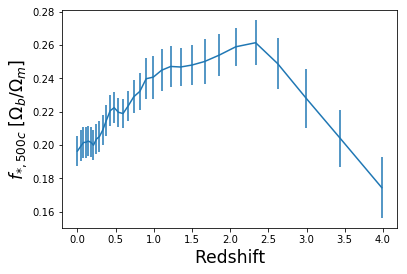

In [8]:
# Test figure for f*500c as a function of redshift

xvals = 1./AGN_aexps - 1.
yvals_all = [ values_at_aexp(AGN_df['halos'], aexp, 'f_star_500c') for aexp in AGN_aexps ]
yvals = [ yval.mean() for yval in yvals_all ]
yvals_err = [ yval.std() for yval in yvals_all ]
plt.errorbar(xvals, [yval/fbaryon(1.) for yval in yvals], yvals_err,label='AGN')
plt.xlabel('Redshift',fontsize='xx-large')
plt.ylabel('$f_{*,500c}$ $[\\Omega_b/\\Omega_m]$',fontsize='xx-large')

In [37]:
# Function to create fbar normalized figures
def plot_fbarnorm_evolution(dfs, field, df_labels, ylabel) :
    '''Plot several dataframes of field evolution (e.g. AGN and CSF)'''
    for df, df_label in zip(dfs,df_labels) :
        aexps = df.aexp.unique()
        redshifts = 1./aexps - 1.
        yvals_all = [ values_at_aexp(df, aexp, field) for aexp in aexps ]
        yvals = [ yval.mean() for yval in yvals_all ]
        yvals_err = [ yval.std() for yval in yvals_all ]
        plt.errorbar(redshifts, [yval/fbaryon(1.) for yval in yvals], yvals_err,label=df_label)
    plt.xlabel('Redshift',fontsize='xx-large')
    plt.ylabel(ylabel,fontsize='xx-large')
    # plt.xscale('log')
    plt.legend()

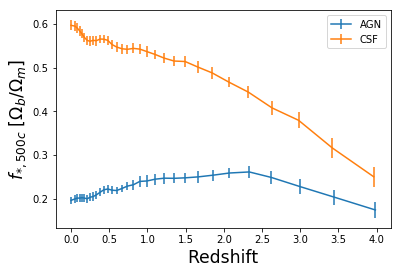

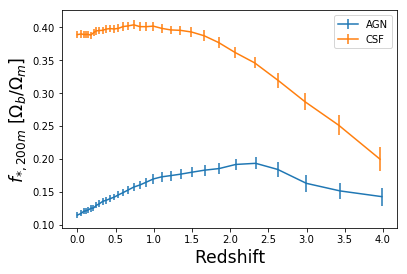

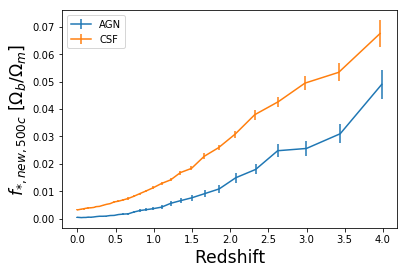

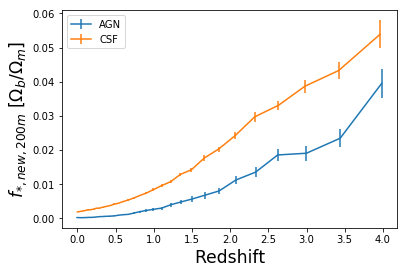

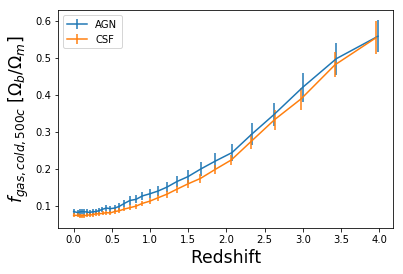

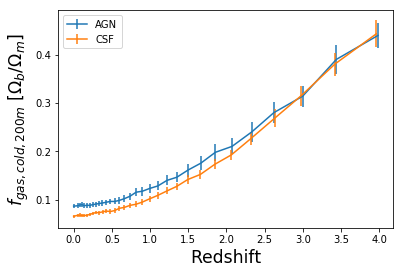

In [38]:
# Let's plot quantities where we can compare AGN and CSF
fields = ['f_star_500c','f_star_200m',
         'f_star_new_500c', 'f_star_new_200m',
         'f_gas_cold_500c', 'f_gas_cold_200m']
labels = ['$f_{*,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{*,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{*,new,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{*,new,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,cold,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,cold,200m}$ $[\\Omega_b/\\Omega_m]$']
for field, label in zip(fields, labels) :
    plot_fbarnorm_evolution([AGN_df['halos'],CSF_df['halos']], field, ['AGN','CSF'], label)
    plt.show()

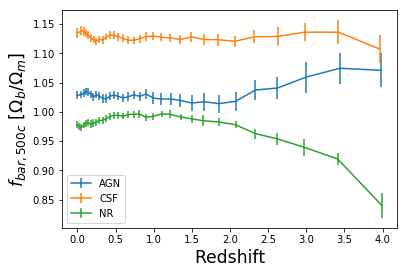

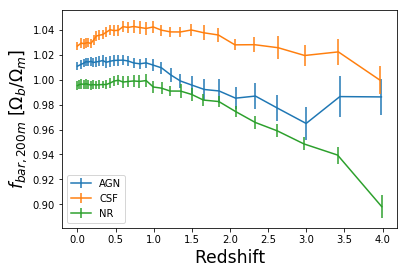

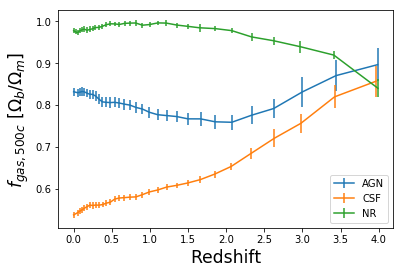

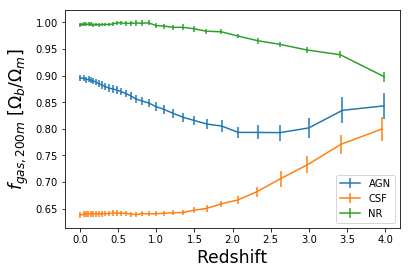

In [39]:
# Let's plot quantities where we can compare AGN, CSF, and NR
fields = ['f_baryon_500c','f_baryon_200m',
         'f_gas_500c', 'f_gas_200m']
labels = ['$f_{bar,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{bar,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,200m}$ $[\\Omega_b/\\Omega_m]$']
for field, label in zip(fields, labels) :
    plot_fbarnorm_evolution([AGN_df['halos'],CSF_df['halos'],NR_df['halos']], field, ['AGN','CSF','NR'], label)
    plt.show()

# Creating cuts on median or quartiles

In [171]:
def create_quantile_cut_label(df, num_quantiles, quantile_labels, quantile_cut_label_name, groupby='aexp',
                                 column_to_cut='M_total_500c') :
    
    
    df[quantile_cut_label_name] = df.groupby(groupby)[column_to_cut].transform(pd.qcut,
                                                                               num_quantiles,
                                                                               labels=quantile_labels,
                                                                                  duplicates='drop')


# Create cut on median mass at each aexp
for df, df_name in zip([AGN_df['halos'], CSF_df['halos']],['AGN','CSF']): 
    # This doesn't work for NR - something about duplicates
    create_quantile_cut_label(df, 2, ['low', 'high'], 'median_M500c_cut_at_aexp', groupby='aexp', 
                              column_to_cut='M_total_500c')

# Create cut on quartile mass at each aexp
for df, df_name in zip([AGN_df['halos'], CSF_df['halos']],['AGN','CSF']): 
    create_quantile_cut_label(df, 4, ['first', 'second', 'third', 'fourth'], 'quartile_M500c_cut_at_aexp', 
                              groupby='aexp', 
                              column_to_cut='M_total_500c')


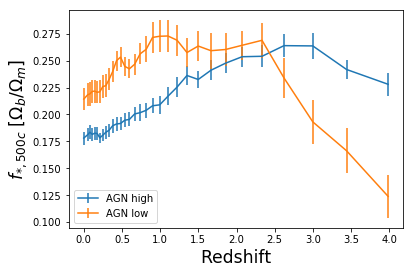

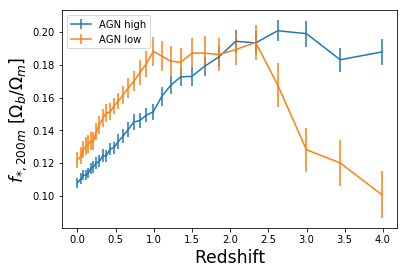

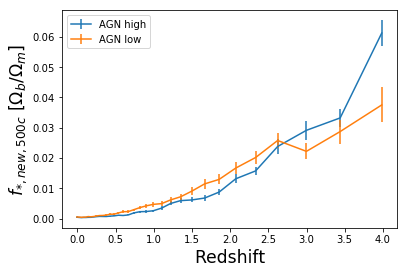

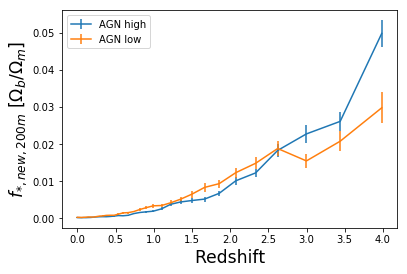

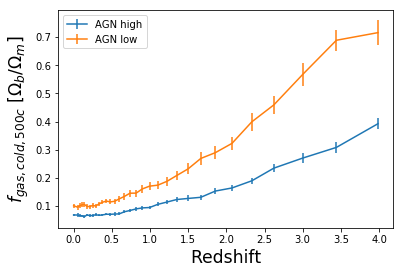

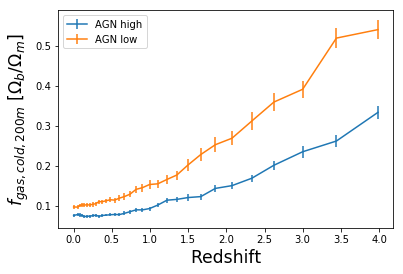

In [188]:
# Let's plot quantities where we can compare AGN and CSF
fields = ['f_star_500c','f_star_200m',
         'f_star_new_500c', 'f_star_new_200m',
         'f_gas_cold_500c', 'f_gas_cold_200m']
labels = ['$f_{*,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{*,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{*,new,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{*,new,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,cold,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,cold,200m}$ $[\\Omega_b/\\Omega_m]$']

# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos'].groupby('median_M500c_cut_at_aexp')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0] for g in gbs], label)
    plt.show()

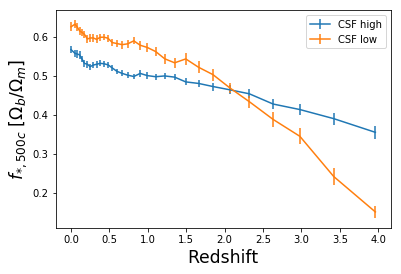

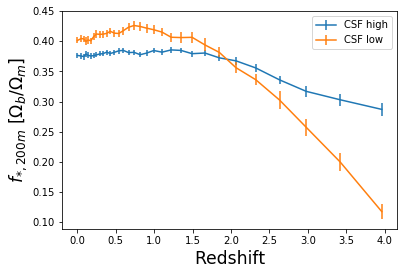

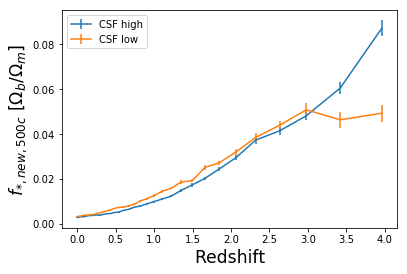

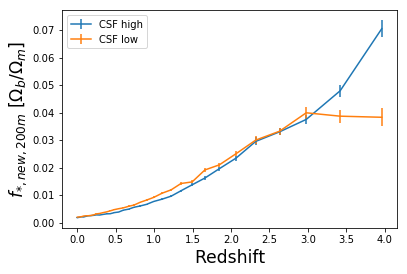

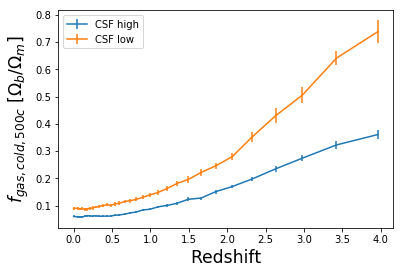

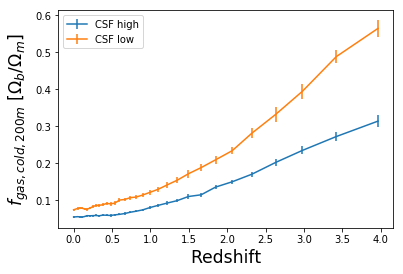

In [189]:
for field, label in zip(fields, labels) :
    gb = CSF_df['halos'].groupby('median_M500c_cut_at_aexp')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0] for g in gbs], label)
    plt.show()


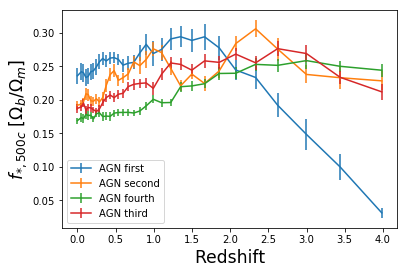

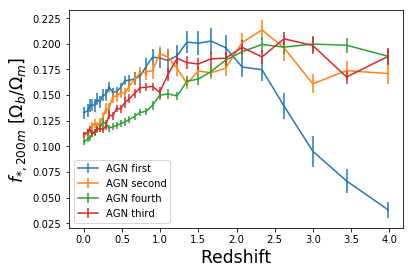

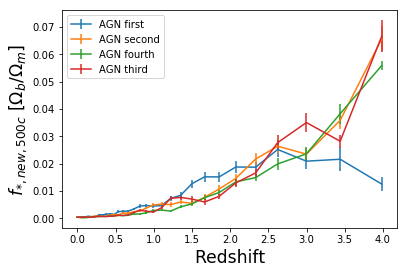

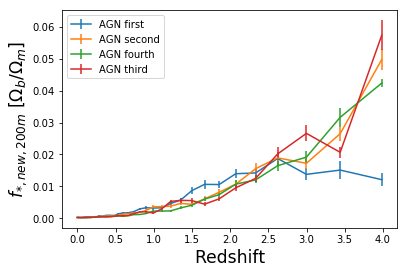

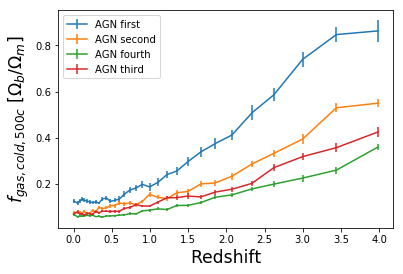

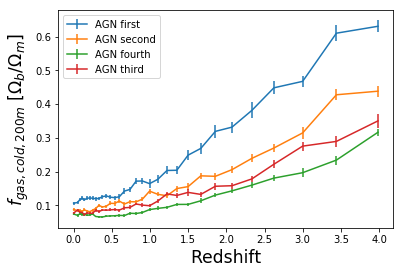

In [190]:
# Need to create sub dataframes according to quartile cut, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos'].groupby('quartile_M500c_cut_at_aexp')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0] for g in gbs], label)
    plt.show()

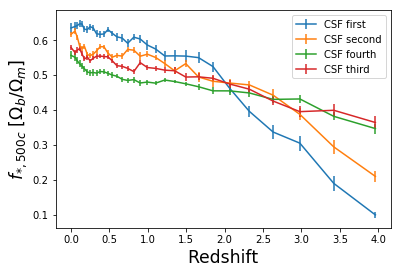

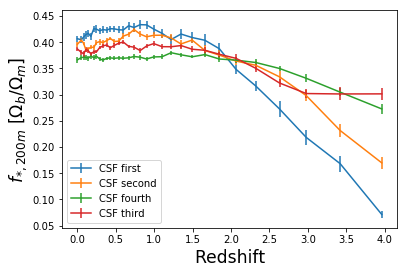

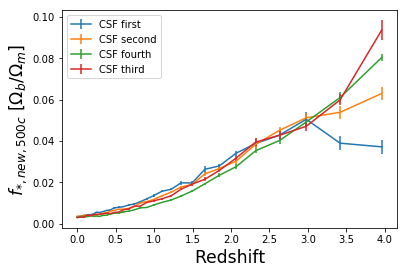

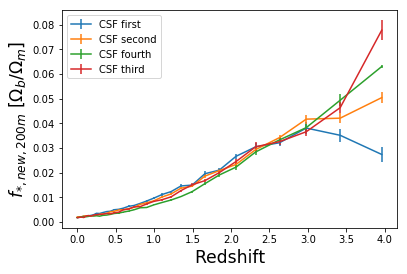

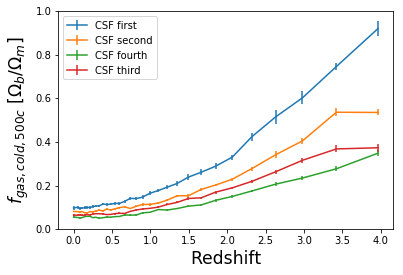

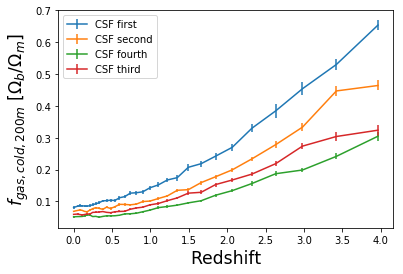

In [191]:
# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = CSF_df['halos'].groupby('quartile_M500c_cut_at_aexp')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0] for g in gbs], label)
    plt.show()

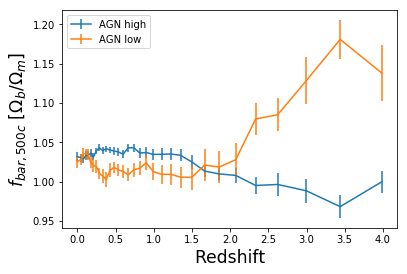

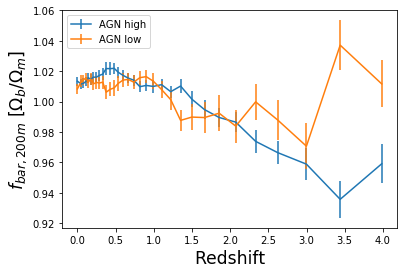

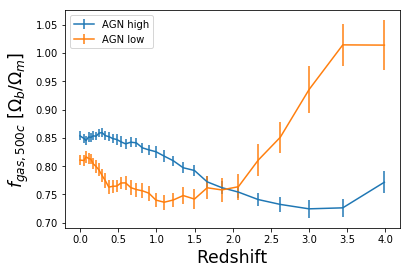

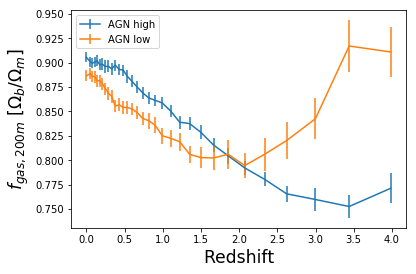

In [192]:
# Let's plot quantities where we can compare AGN, CSF, and NR - Note: NR cuts went wrong (bug in masses???)
fields = ['f_baryon_500c','f_baryon_200m',
         'f_gas_500c', 'f_gas_200m']
labels = ['$f_{bar,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{bar,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,200m}$ $[\\Omega_b/\\Omega_m]$']

# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos'].groupby('median_M500c_cut_at_aexp')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0] for g in gbs], label)
    plt.show()

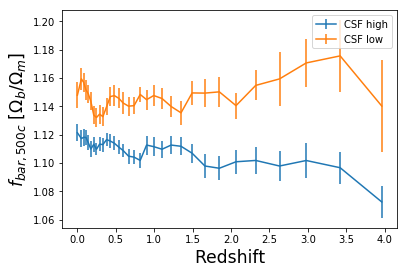

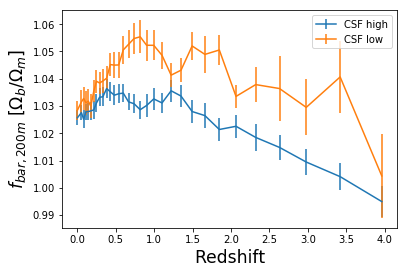

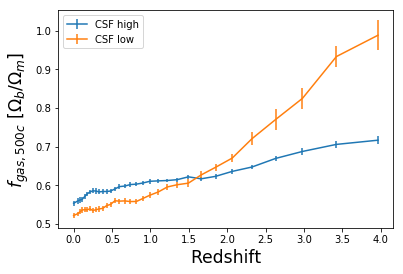

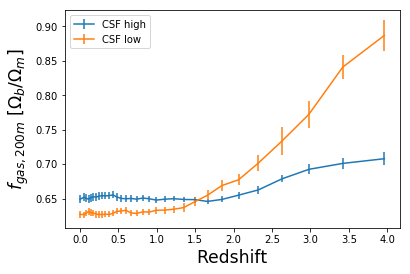

In [193]:
# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = CSF_df['halos'].groupby('median_M500c_cut_at_aexp')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0] for g in gbs], label)
    plt.show()

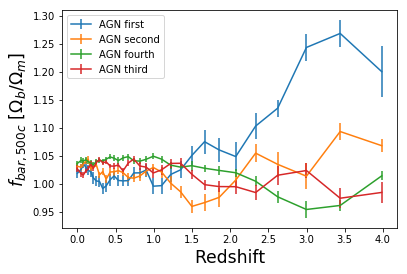

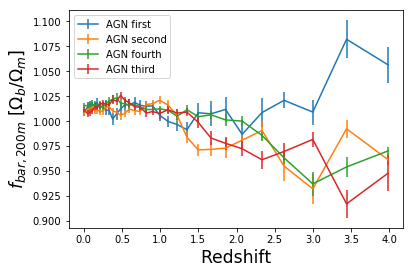

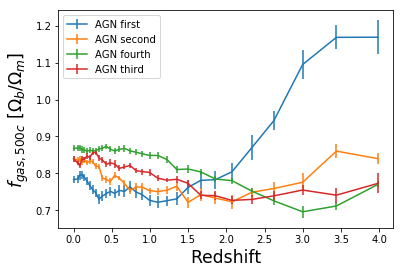

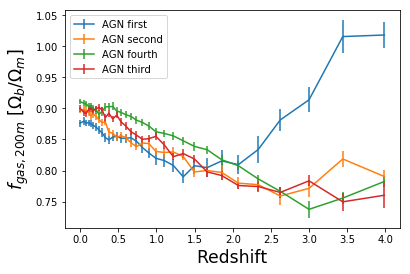

In [194]:
# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos'].groupby('quartile_M500c_cut_at_aexp')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0] for g in gbs], label)
    plt.show()

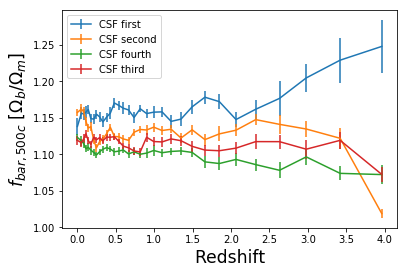

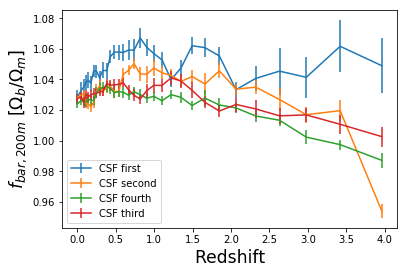

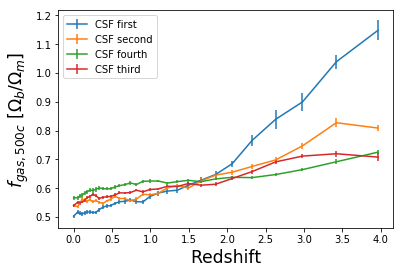

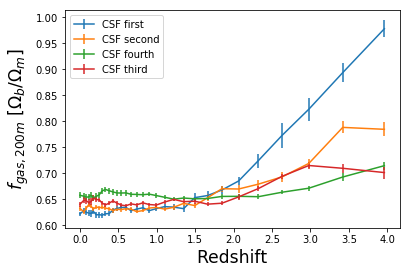

In [195]:
# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = CSF_df['halos'].groupby('quartile_M500c_cut_at_aexp')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0] for g in gbs], label)
    plt.show()

# Cuts on z=0 mass bins and comparison to average mass growth

In [233]:
def get_z0_masses(df, masskey) :
    # Create dictionary for z0_parent_mass
    return df.loc[df['aexp']-1.<.01].set_index('id').to_dict()[masskey]

for df in [AGN_df, CSF_df, NR_df] :
    # Rename mergertree columns to enable the merge
    df['mergertree'].rename(columns = {'child_id':'id', 'child_aexp':'aexp'}, inplace = True)
    
    # Will need to merge on 'child_id' and 'child_aexp' corresponding to 'id' and 'aexp' from halos, and z0_parent_id is what we want.  
    df['halos_and_mergertree'] = pd.merge(df['halos'], df['mergertree'].loc[df['mergertree']['is_main_line'] == 1], on=['id','aexp'])
    
    for masskey in ['M_total_500c', 'M_total_200m'] :
        z0mass_dict = get_z0_masses(df['halos_and_mergertree'], masskey=masskey)
        df['halos_and_mergertree']['z0_'+masskey] = df['halos_and_mergertree']['z0_parent_id'].map(z0mass_dict)

# Create cut on median mass at z0
for df, df_name in zip([AGN_df['halos_and_mergertree'], CSF_df['halos_and_mergertree']],['AGN','CSF']): 
    # This doesn't work for NR - something about duplicates
    create_quantile_cut_label(df, 2, ['low', 'high'], 'median_M500c_cut_at_z0', groupby='aexp', 
                              column_to_cut='z0_M_total_500c')

# Create cut on quartile mass at each aexp
for df, df_name in zip([AGN_df['halos_and_mergertree'], CSF_df['halos_and_mergertree']],['AGN','CSF']): 
    create_quantile_cut_label(df, 4, ['first', 'second', 'third', 'fourth'], 'quartile_M500c_cut_at_z0', 
                              groupby='aexp', 
                              column_to_cut='z0_M_total_500c')

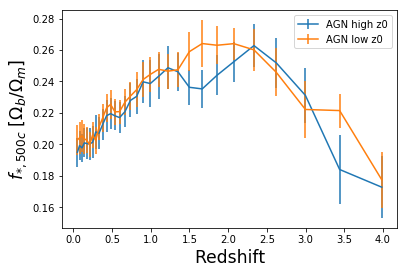

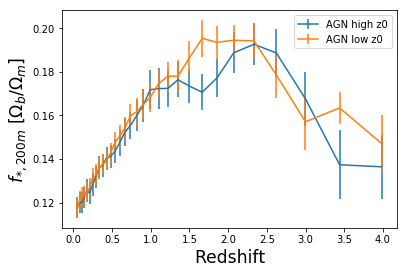

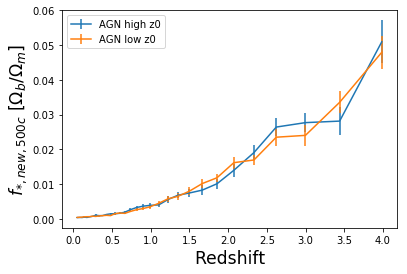

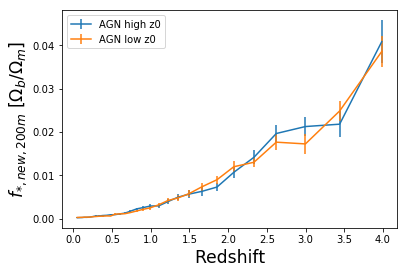

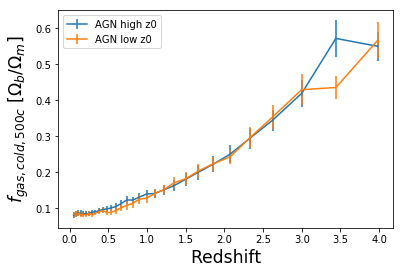

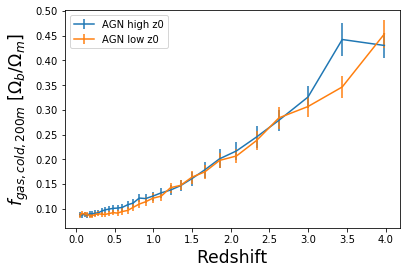

In [241]:
# Let's plot quantities where we can compare AGN and CSF
fields = ['f_star_500c','f_star_200m',
         'f_star_new_500c', 'f_star_new_200m',
         'f_gas_cold_500c', 'f_gas_cold_200m']
labels = ['$f_{*,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{*,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{*,new,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{*,new,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,cold,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,cold,200m}$ $[\\Omega_b/\\Omega_m]$']

# Need to create sub dataframes according to cut at z=0, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos_and_mergertree'].groupby('median_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0]+' z0' for g in gbs], label)
    plt.show()

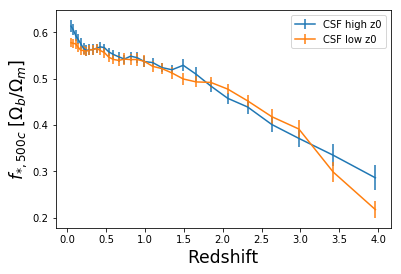

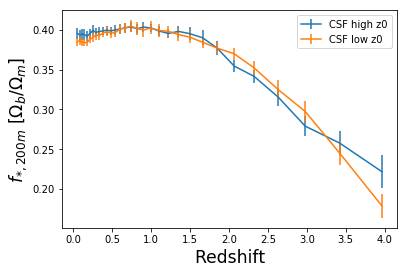

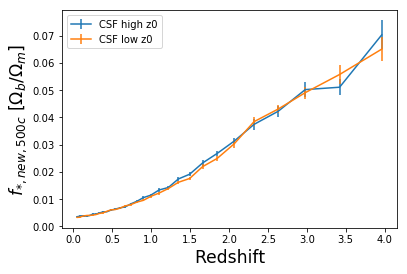

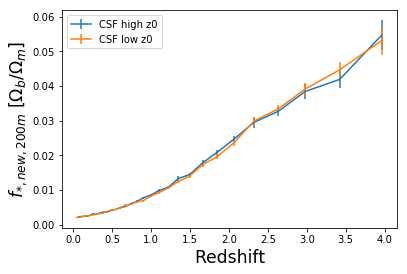

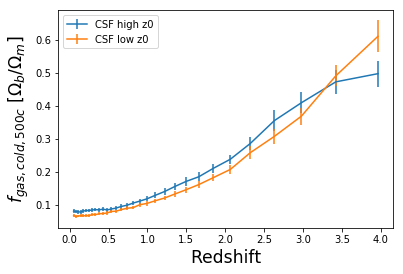

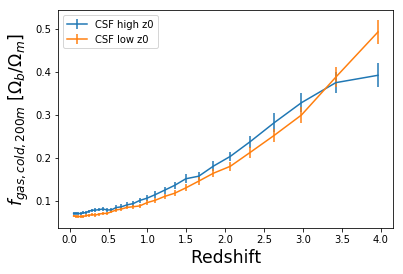

In [242]:
# Need to create sub dataframes according to cut at z=0, etc.
for field, label in zip(fields, labels) :
    gb = CSF_df['halos_and_mergertree'].groupby('median_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0]+' z0' for g in gbs], label)
    plt.show()

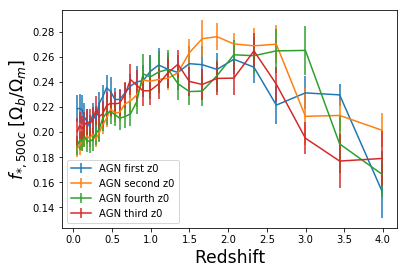

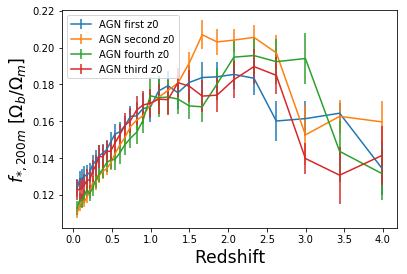

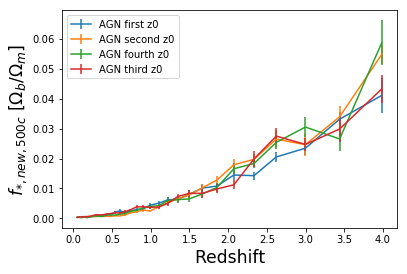

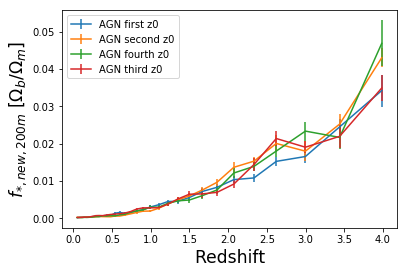

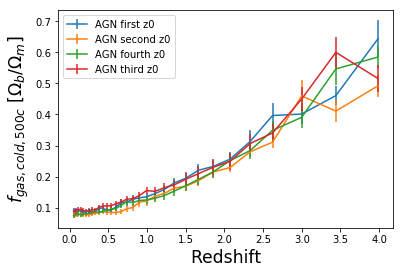

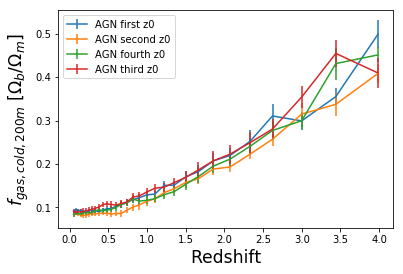

In [243]:
# Need to create sub dataframes according to quartile cut, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos_and_mergertree'].groupby('quartile_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0]+' z0' for g in gbs], label)
    plt.show()

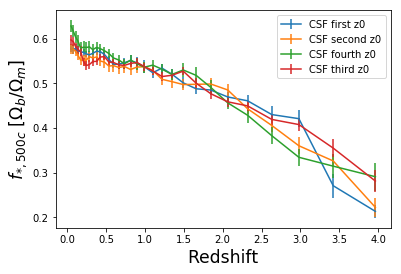

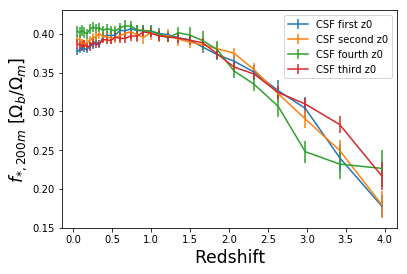

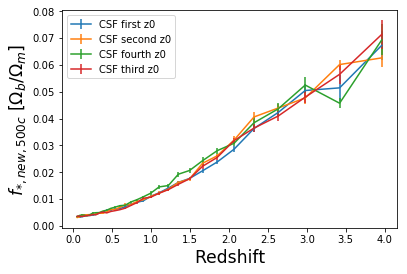

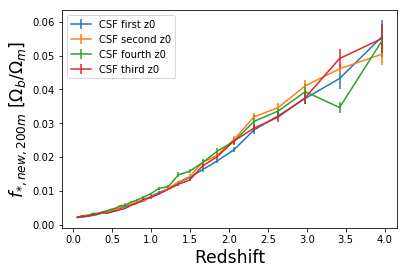

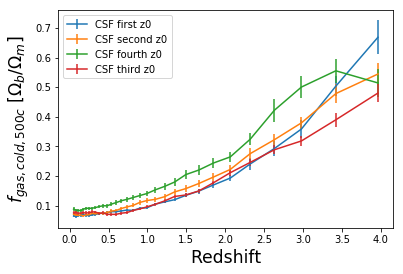

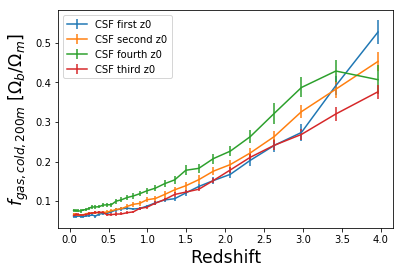

In [244]:
# Need to create sub dataframes according to quartile cut, etc.
for field, label in zip(fields, labels) :
    gb = CSF_df['halos_and_mergertree'].groupby('quartile_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0]+' z0' for g in gbs], label)
    plt.show()

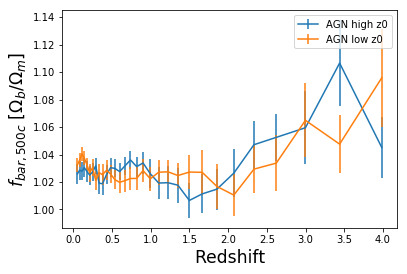

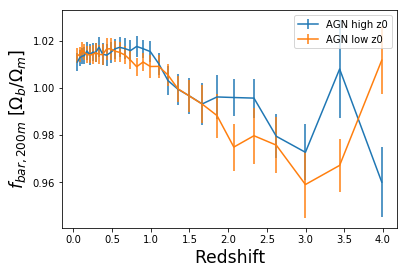

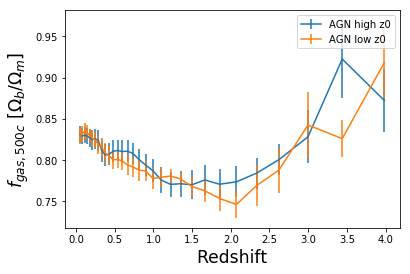

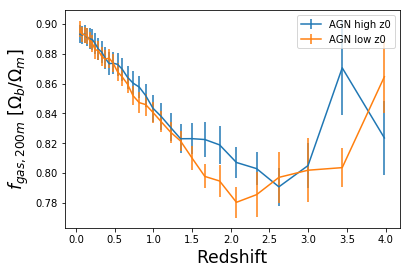

In [245]:
# Let's plot quantities where we can compare AGN, CSF, and NR - Note: NR cuts went wrong (bug in masses???)
fields = ['f_baryon_500c','f_baryon_200m',
         'f_gas_500c', 'f_gas_200m']
labels = ['$f_{bar,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{bar,200m}$ $[\\Omega_b/\\Omega_m]$',
         '$f_{gas,500c}$ $[\\Omega_b/\\Omega_m]$', '$f_{gas,200m}$ $[\\Omega_b/\\Omega_m]$']

# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = AGN_df['halos_and_mergertree'].groupby('median_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['AGN '+g[0]+' z0' for g in gbs], label)
    plt.show()

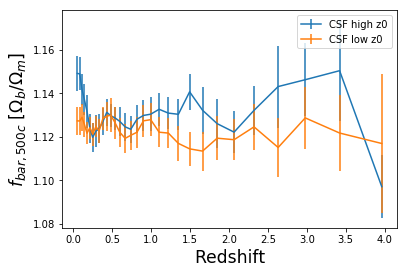

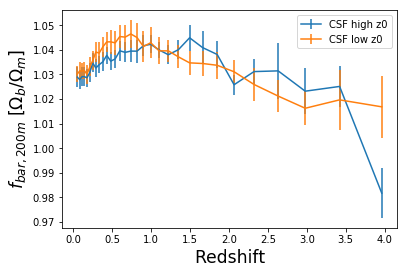

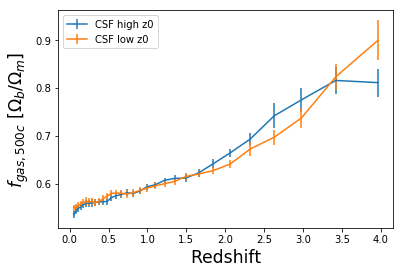

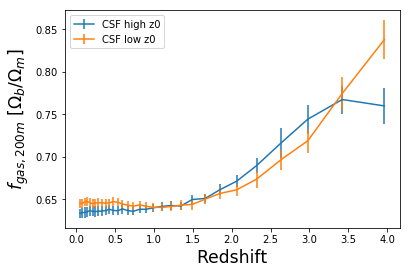

In [246]:
# Need to create sub dataframes according to median cut, etc.
for field, label in zip(fields, labels) :
    gb = CSF_df['halos_and_mergertree'].groupby('median_M500c_cut_at_z0')
    gbs = [ (key, gb.get_group(key)) for key in gb.groups ]
    plot_fbarnorm_evolution([g[1] for g in gbs], field, ['CSF '+g[0]+' z0' for g in gbs], label)
    plt.show()